<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [55]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem1.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


### ✅ 1-1. EDA

date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64
                 count        mean         std         min         25%  \
Temperature    17910.0   20.749036    0.994012   19.000000   20.100000   
Humidity       17910.0   27.589163    5.043595   16.745000   24.390000   
Light          17910.0   78.157369  168.574068  -99.000000    0.000000   
CO2            17889.0  647.700865  285.997340  412.750000  453.000000   
HumidityRatio  17910.0    0.004175    0.000755    0.002674    0.003702   
Occupancy      17910.0    0.117253    0.321730    0.000000    0.000000   

                      50%        75%          max  Skewness  Kurtosis  
Temperature     20.600000   21.20000    24.408333  1.047196  1.232722  
Humidity        27.200000   31.29000    39.500000 -0.023129 -0.704852  
Light            0.000000   22.00000  1581.000000  2.147122  3.955977  
CO2            532.666667  722.00000  20

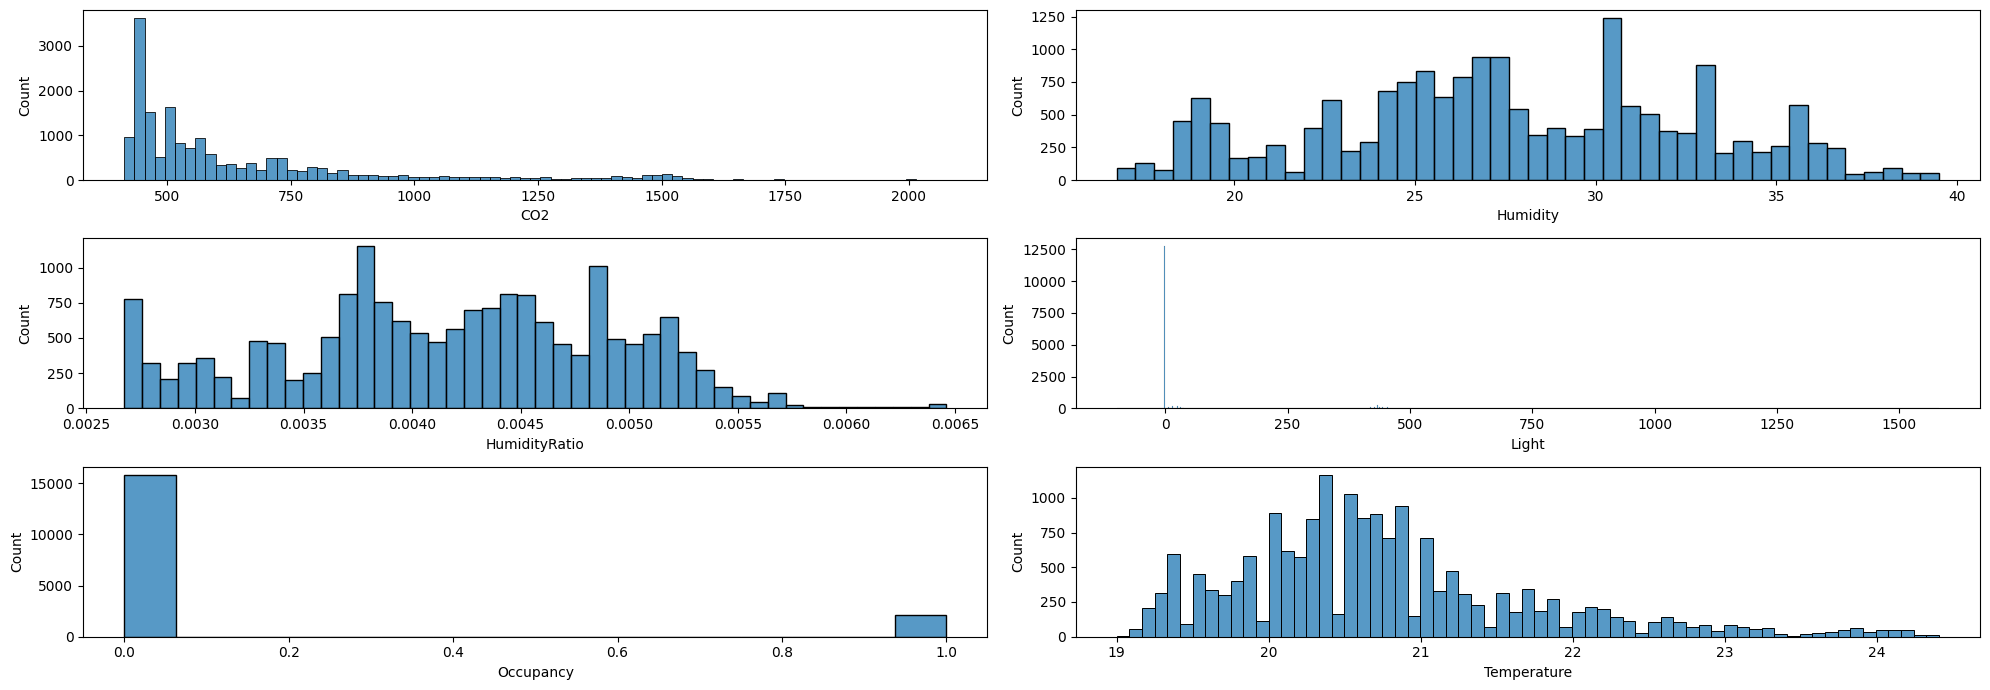

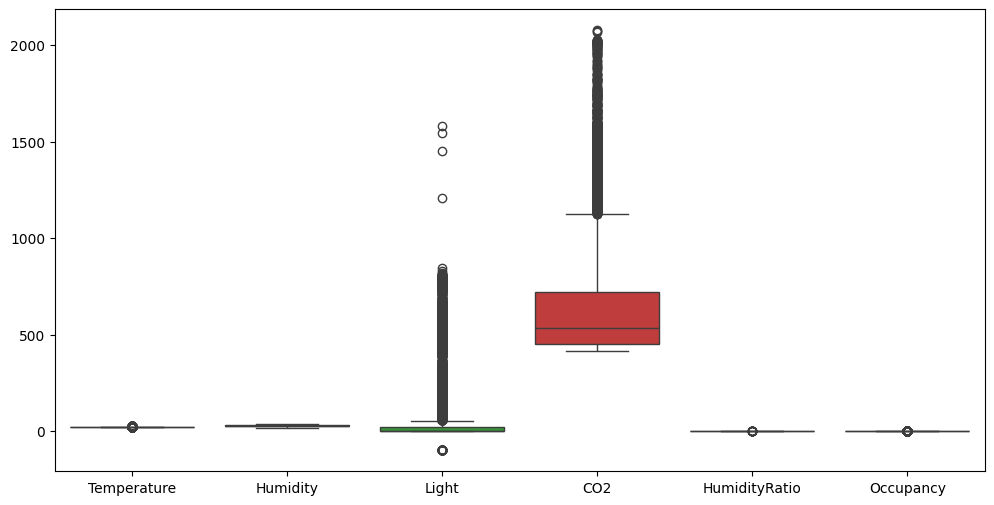

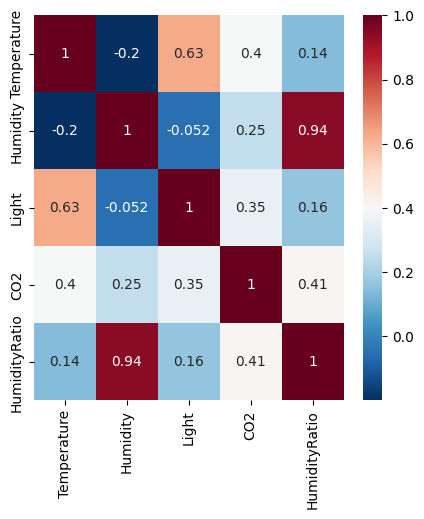

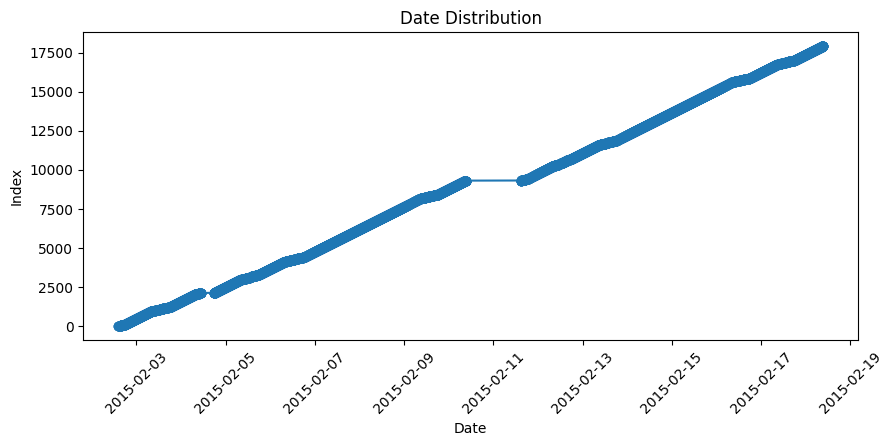

1        121.0
2         60.0
3         59.0
4        120.0
5        121.0
         ...  
17905     59.0
17906     61.0
17907    300.0
17908     60.0
17909    180.0
Name: date, Length: 17909, dtype: float64

1. 결측치 존재 여부 : CO2 결측치가 총 21개이다. CO2 분포를 활용하여 결측치 대체 방식을 사용할 수 있을 것 같다.
2. 데이터 분포 : Light와 CO2 는 75%와 max 의 차이가 큰 것으로 보아, 이상치가 존재할 수 있고, Boxplot을 통해 확인한 결과 이상치로 보이는 분포를 확인했다.
3. 상관관계 : humidity와 humidity ratio의 상관관계가 높지만, 이는 같은 성질의 컬럼으로 간주되어 둘의 상관 관계가 타당해보인다.
              그외 다른 컬럼들 간의 상관관계는 존재하지 않아, 다중 공선성이 의심되지는 않는다.
4. Data 컬럼의 연속성 : 시각화 결과 중간에 빠진 부분이 있는 것으로 보이며, 시계열 데이터로 사용할 경우 이는 결측치로 볼 수 있다.




In [56]:
# 결측
print(df.isna().sum())

# 분포도
des = df.describe().T
des['Skewness'] = df.drop(columns = 'date', axis =1).skew()
des['Kurtosis'] = df.drop(columns = 'date', axis =1).kurtosis()
print(des)

#  분포도 시각화 (data 제외)
cols = df.columns.difference(['date']).tolist()

fig, axes = plt.subplots(3,2, figsize =(20,7))

for i, axes in enumerate(axes.flat[:len(cols)]) :
  col_i = df[cols].columns[i]

  sns.histplot(df[col_i], ax = axes)

plt.tight_layout()
plt.show()

## 이상치 및 분포도 Box plot 확인
plt.figure(figsize = (12, 6))
sns.boxplot(df.drop(columns = 'date', axis =1))


# 데이터의 상관 관계 (data 제외)
cor_cols = ['Temperature',	'Humidity'	,'Light'	,'CO2'	,'HumidityRatio']
cor_mat = df[cor_cols].corr(method = 'pearson')
plt.figure(figsize = (5,5))
sns.heatmap(cor_mat, cmap = 'RdBu_r', annot = True)


# Date 의 연속성 확인
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10, 4))
plt.plot(df['date'], range(len(df)), marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Index")
plt.title("Date Distribution")
plt.xticks(rotation=45)
plt.show()

time_diff = df['date'].diff().dt.seconds.dropna()
print(time_diff)

print("""
1. 결측치 존재 여부 : CO2 결측치가 총 21개이다. CO2 분포를 활용하여 결측치 대체 방식을 사용할 수 있을 것 같다.
2. 데이터 분포 : Light와 CO2 는 75%와 max 의 차이가 큰 것으로 보아, 이상치가 존재할 수 있고, Boxplot을 통해 확인한 결과 이상치로 보이는 분포를 확인했다.
3. 상관관계 : humidity와 humidity ratio의 상관관계가 높지만, 이는 같은 성질의 컬럼으로 간주되어 둘의 상관 관계가 타당해보인다.
              그외 다른 컬럼들 간의 상관관계는 존재하지 않아, 다중 공선성이 의심되지는 않는다.
4. Data 컬럼의 연속성 : 시각화 결과 중간에 빠진 부분이 있는 것으로 보이며, 시계열 데이터로 사용할 경우 이는 결측치로 볼 수 있다.

""")

✅ 1-2. 결측치 대체 방안


날짜면 CO2의 분포를 확인해 봤을때, CO2의 결측치는 시계열에 따르는 특징을 가진다고 보여진다. 결측치 또한 같은 월/일에 분 단위로 결측이 생성되어있기
때문에, 보간법을 사용하여 Occupany내에서 가장 가까운 CO2값으로 채워, 데이터의 특징을 최대한 보존하여 결측을 처리한다.



0

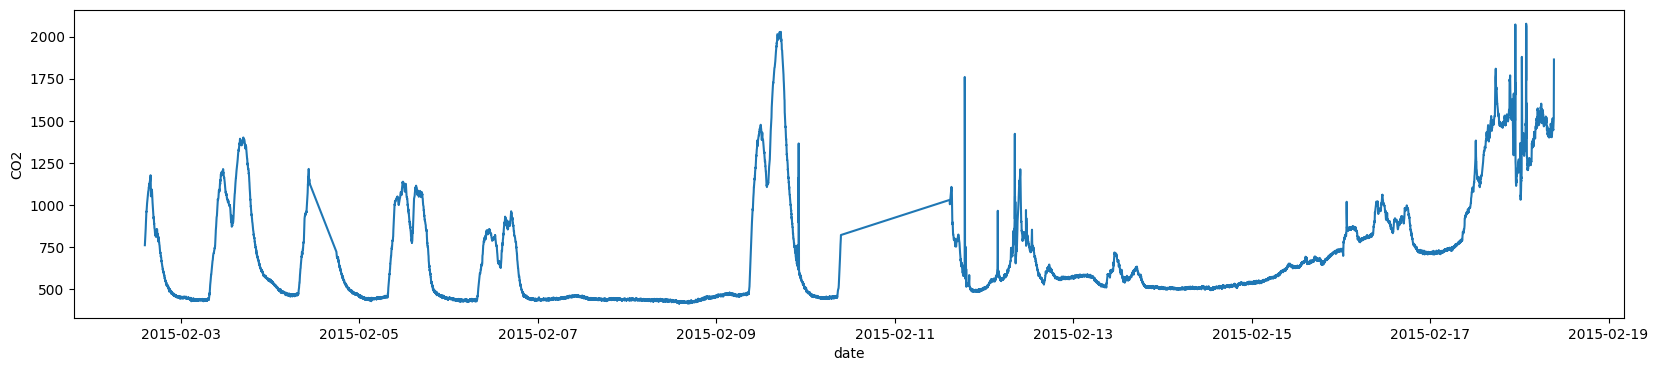

In [57]:
plt.figure(figsize=(20, 4))
sns.lineplot(x = 'date',y = 'CO2', data = df)

print("""
날짜면 CO2의 분포를 확인해 봤을때, CO2의 결측치는 시계열에 따르는 특징을 가진다고 보여진다. 결측치 또한 같은 월/일에 분 단위로 결측이 생성되어있기
때문에, 보간법을 사용하여 Occupany내에서 가장 가까운 CO2값으로 채워, 데이터의 특징을 최대한 보존하여 결측을 처리한다.
""")

# df2 로 원본 유지
df2 = df.copy()
df2['CO2'] = df2.groupby('Occupancy')['CO2'].transform(lambda x: x.interpolate(method='nearest'))

df2['CO2'].isna().sum()

✅ 1-3. 추가적으로 데이터의 품질 관리 향상을 시킬만한 내용


추가적인 처리로 Light의 최소값인 -99을 0으로 바꿔주고. IQR방식으로 이상치를 처리하도록 하여, 모델이 특정 값에 영향을 
받는 경우를 방지한다. 



<Axes: >

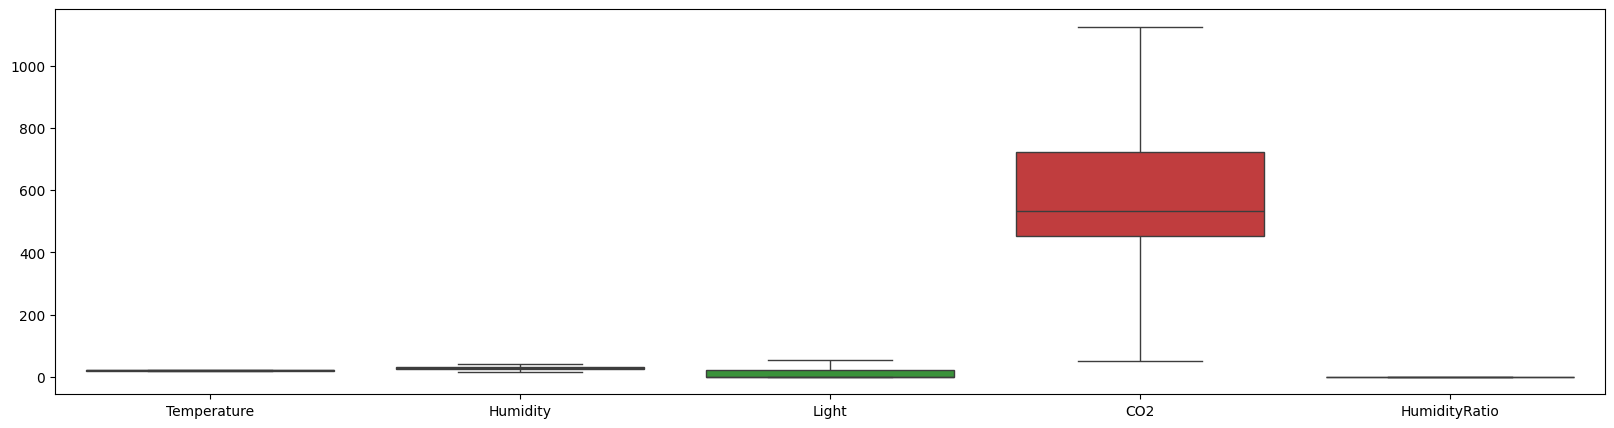

In [73]:
print("""
추가적인 처리로 Light의 최소값인 -99을 0으로 바꿔주고. IQR방식으로 이상치를 처리하도록 하여, 모델이 특정 값에 영향을
받는 경우를 방지한다.
""")

# Light = -99 = 0치환
df2.loc[df2['Light'] == -99] = 0


cols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
# IQR - Clip 하여, 이상치인 값들을 해당 범위의 Q3, Q3으로 변경한다.
def remove_outlier(df) :
  df3 = df2.copy()
  for x in cols:
    q1 = df3[x].quantile(0.25)
    q3 = df3[x].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    df3[x] = df3[x].clip(lower, upper)

  return df3.reset_index(drop = True)

df3 = remove_outlier(df2)

plt.figure(figsize = (20, 5))
sns.boxplot(df3[cols])


✅ 2-1. 데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성

   Occupancy  count  ratio
0          0  15810  88.27
1          1   2100  11.73

Occupany 의 0이 15810개, 1이 2100개로 데이터 불균형으로 이루어져 있다. 



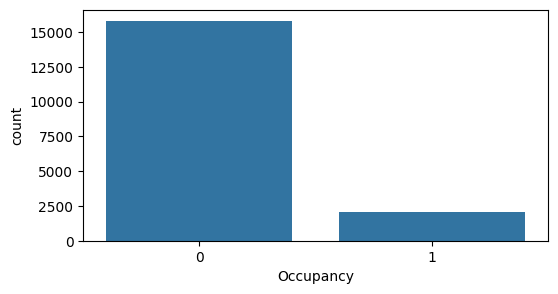

In [59]:
target = df['Occupancy'].value_counts().reset_index()
target['ratio'] = round(target['count'] / target['count'].sum() * 100,2)
target

plt.figure(figsize = (6,3))
sns.barplot(x = target['Occupancy'], y = target['count'], data = target)
print(target)
print("""
Occupany 의 0이 15810개, 1이 2100개로 데이터 불균형으로 이루어져 있다.
""")


✅ 2-2. 오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

In [60]:
print("""
오버 샘플링은 소수의 클래스 늘려, 균형을 맞추는 기법으로, 랜덤 오버 샘플링, SMOTE 기법이 있다.
1) 랜덤 오버 샘플링
  - 소수 클래스를 단순 복사하는 방식으로 기존 데이터와 동일한 복제 데이터를 생성한다.
  - 단순 복제로 인해, 과적합이 발생 할 수 있지만, 사용 방법이 간단한다.

2) SMOTE
  - K개의 인접한 이웃을 찾아,K개 이웃의 차이를 일정한 값으로 만들어 데이터를 생성
  - 처리 속도가 느리다는 단점이 있지만, 과적합 문제를 방식할 수 있음
""")


오버 샘플링은 소수의 클래스 늘려, 균형을 맞추는 기법으로, 랜덤 오버 샘플링, SMOTE 기법이 있다. 
1) 랜덤 오버 샘플링 
  - 소수 클래스를 단순 복사하는 방식으로 기존 데이터와 동일한 복제 데이터를 생성한다. 
  - 단순 복제로 인해, 과적합이 발생 할 수 있지만, 사용 방법이 간단한다.

2) SMOTE 
  - K개의 인접한 이웃을 찾아,K개 이웃의 차이를 일정한 값으로 만들어 데이터를 생성
  - 처리 속도가 느리다는 단점이 있지만, 과적합 문제를 방식할 수 있음 



✅ 2-2. 오버샘플링 수행 및 결과

Random_Oversampling 결과 : Counter({1: 15816, 0: 15816})
SMOTE 결과 : Counter({1: 15816, 0: 15816})


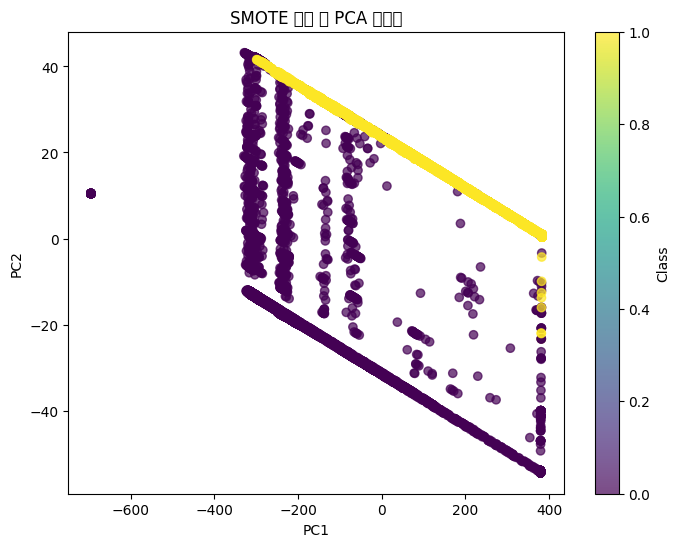


PCA를 통해서, SMOTE의 분포도를 확인 
  - 원래 분포를 보존하면서 매끄러운 경계를 형성, 소수 클래스가 생성됨을 볼 수 있다. 
  - 데이터의 과적합 문제를 해결 할 수 있기 때문에 SMOTE 기법을 통해 데이터 불균형을 처리한다. 



In [79]:
from typing import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

# df3 으로 X, y분리
X = df3.drop(columns= ['date','Occupancy'], axis = 1)
y = df3['Occupancy']


# Random_Over
random = RandomOverSampler()
over_x, over_y = random.fit_resample(X, y)
print(f"Random_Oversampling 결과 : {Counter(over_y)}")


# SMOTE
sm = SMOTE()
sm_x, sm_y = sm.fit_resample(X, y)
print(f"SMOTE 결과 : {Counter(sm_y)}")

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 예시: SMOTE 후 데이터 시각화
pca = PCA(n_components=2)
smote_pca = pca.fit_transform(sm_x)

plt.figure(figsize=(8, 6))
plt.scatter(smote_pca[:, 0], smote_pca[:, 1], c=sm_y, cmap='viridis', alpha=0.7)
plt.title('SMOTE 적용 후 PCA 시각화')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Class')
plt.show()

print("""
PCA를 통해서, SMOTE의 분포도를 확인
  - 원래 분포를 보존하면서 매끄러운 경계를 형성, 소수 클래스가 생성됨을 볼 수 있다.
  - 데이터의 과적합 문제를 해결 할 수 있기 때문에 SMOTE 기법을 통해 데이터 불균형을 처리한다.
""")

✅ 2-3. 오버 샘플링, 원 데이터를 사용하여 정확도 측면, 속도 측면을 고려한 모델을 선정하고 이유를 설명

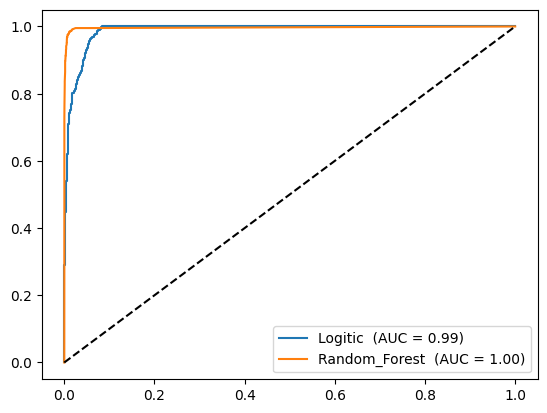

           Model  Accuracy_Score  ROC_Score    Second
0        Logitic        0.958682   0.878559  0.083275
1  Random_Forest        0.990322   0.980899  1.592820


In [90]:
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import MinMaxScaler


# 원 데이터
# 1) MinMaxScaler
mm = MinMaxScaler()

m_X = pd.DataFrame(mm.fit_transform(X), columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(m_X, y, test_size = 0.3, random_state = 42)

# 2) Models
models = {'Logitic' : LogisticRegression(),
          'Random_Forest': RandomForestClassifier()}


result = []
for name, model in models.items():
  start = time.time()
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  pred_proba = model.predict_proba(X_test)[:,1]
  accuracy = accuracy_score(y_test, pred)
  roc_score = roc_auc_score(y_test, pred)
  end = time.time()

  result.append([name, accuracy, roc_score, end-start])

  fpr, tpr, threshold = roc_curve(y_test, pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.plot(fpr, tpr, label = f'{name}  (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1], 'k--')
plt.legend(loc = 'lower right')
plt.show()

result = pd.DataFrame(result, columns = ['Model', 'Accuracy_Score','ROC_Score', 'Second'])
print(result)

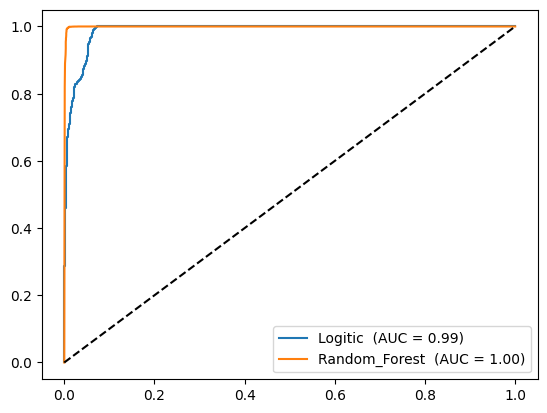

           Model  Accuracy_Score  ROC_Score    Second
0        Logitic        0.960274   0.960590  0.047503
1  Random_Forest        0.993783   0.993809  2.880313


In [92]:
# 원 데이터
# 1) MinMaxScaler
mm = MinMaxScaler()

smm_X = pd.DataFrame(mm.fit_transform(sm_x), columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(smm_X, sm_y, test_size = 0.3, random_state = 42)

# 2) Models
models = {'Logitic' : LogisticRegression(),
          'Random_Forest': RandomForestClassifier()}


result = []
for name, model in models.items():
  start = time.time()
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  pred_proba = model.predict_proba(X_test)[:,1]
  accuracy = accuracy_score(y_test, pred)
  roc_score = roc_auc_score(y_test, pred)
  end = time.time()

  result.append([name, accuracy, roc_score, end-start])

  fpr, tpr, threshold = roc_curve(y_test, pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.plot(fpr, tpr, label = f'{name}  (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1], 'k--')
plt.legend(loc = 'lower right')
plt.show()

result = pd.DataFrame(result, columns = ['Model', 'Accuracy_Score','ROC_Score', 'Second'])
print(result)

In [ ]:
print("""
Logisitc 과 Random Forest 를 사용하여, 원 데이터와 SMOTE 데이터 테스트 결과
1) 정확도 측면 : SMOTE 처리 한 데이터가  로지스틱 정확도가 0.958682 > 0.960274, 랜덤 포레스트는 0.99032 > 0.993783로
                 정확도 측면에서 SMOTE가 더 우수하다.
2) 속도 측면 : 원데이터에서 로지스틱 회귀 모델이 0.083275 > 0.047503 랜덤 포레스트 모델은 1.592820 > 2.880313로 수행 속도가
               더 걸리는 것으로 나타난다.

불균형 데이터 처리에 대한 영향도를 두 모델을 통해 확인해본 결과 오버 샘플링을 수행한 데이터는
정확도와 ROC_Score가 좀 더 개선된 것을 나타난다. ROC 는 양성과 음성을 잘 구분하는 평가 척도임을 가만한다면,
불균형 데이터처리가 원본 데이터를 학습 하는 것보다 긍정적인 영향을 주었다. 데이터의 불균형으로 인한 과적합을 방지하고
예측 모델의 일반화를 가능하게 하였다고 할 수 있다.
""")

### ✅ 통계분석
✅ 1.1 공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정

In [144]:
import pandas as pd
import numpy as np
from scipy.stats import binomtest

df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv')
df.head()

# 귀무가설 : 진공관의 중앙값이 1만 시간 이다.
# 대립가설 : 진공관의 중앙값이 1만 시간이 아니다.
# Sign Test

# mu = 10000, 중위수 10000와 같은 값을 제외
df1 = df.loc[df['life span'] != 10000]


from scipy.stats import wilcoxon
stat, p_val = wilcoxon(df1['life span'] - 10000)
print(p_val)


0.25


#### 📌 부호 검정 (Sign Test, binom_test):
단순히 각 쌍의 차이가 양수인지 음수인지(즉, 10,000시간보다 크거나 작은지만)만 고려합니다. 데이터의 분포나 차이의 크기를 전혀 가정하지 않기 때문에, 분포에 대한 추가 가정이 없는 경우 보수적인 선택.

####  📌 Wilcoxon Signed-Rank Test:
각 쌍의 차이의 부호와 그 크기를 모두 반영하여 순위를 매깁니다. 차이들이 대칭 분포를 이룬다는 가정을 전제로 하면, 이 검정은 부호 검정보다 더 강력(powerful)한 결과.

만약 단순히 부호(양/음)만으로 중앙값이 10,000시간과 차이가 있는지 확인하고자 한다면, binom_test (즉, 전통적인 부호 검정)을 사용하는 것
반면에, 데이터의 차이 크기 정보(즉, 순위)를 활용하고 차이의 대칭성을 가정할 수 있다면 Wilcoxon Signed-Rank Test를 사용하는 것도 타당

In [139]:
## 다른 문제
# 공장에서 농도가 60%라고 주장하며, 품질 관리팀에서 10개의 샘플을 뽑았다. 유의수군 5%에서 검정

# 귀무 : 농도가 60%이다
# 대립 : 농다가 60%가 아니다.


x =[52 ,50 ,62 ,75 ,26 ,45 ,62 ,35 ,57 ,14 ]

from scipy import stats
stats.wilcoxon(pd.Series(x)-60)


WilcoxonResult(statistic=9.5, pvalue=0.083984375)

✅ 1.2 데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성

In [145]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem3_covid2.csv')
df.head()

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0


In [164]:
df['date'] = pd.to_datetime(df['date'])

# location = level0 기준으로 cumsum()
target = df.groupby(['location','date'])['new_cases'].sum().groupby(level = 0).cumsum().reset_index()
target

,location,date,new_cases
1,Austria,2021-01-02,3487.0
2,Austria,2021-01-03,4953.0
3,Austria,2021-01-04,6595.0
4,Austria,2021-01-05,8906.0
5,Austria,2021-01-06,11375.0
...,...,...,...
11890,Vanuatu,2021-10-28,5.0
11891,Vanuatu,2021-10-29,5.0
11892,Vanuatu,2021-10-30,5.0
11893,Vanuatu,2021-10-31,5.0


✅ 1.3 1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라) 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성

In [169]:
from scipy.spatial import distance
import statsmodels.api as sm

countries = target.location.unique()

lst =[]
for country in countries:
  acf_value = sm.tsa.stattools.acf(target[target.location == country]['new_cases'], nlags = 50 , fft = False)
  lst.append([country] + list(acf_value[1:]))

lag50 = pd.DataFrame(lst)

lag50.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,Austria,0.986910,0.973895,0.961027,0.948347,0.935884,0.923563,0.911388,0.899286,0.887245,...,0.520420,0.509183,0.497960,0.486745,0.475543,0.464370,0.453267,0.442242,0.431334,0.420483
1,Bangladesh,0.993958,0.987757,0.981401,0.974895,0.968240,0.961439,0.954491,0.947394,0.940150,...,0.644404,0.633643,0.622824,0.611950,0.601019,0.590035,0.579005,0.567934,0.556820,0.545668
2,Bhutan,0.994586,0.989147,0.983590,0.977976,0.972226,0.966459,0.960636,0.954678,0.948797,...,0.700749,0.691193,0.681564,0.671847,0.662047,0.652165,0.642174,0.632091,0.621911,0.611642
3,Chile,0.992455,0.984846,0.977165,0.969415,0.961598,0.953711,0.945768,0.937768,0.929723,...,0.647890,0.638302,0.628672,0.618999,0.609285,0.599527,0.589710,0.579831,0.569911,0.559947
4,Colombia,0.993340,0.986596,0.979760,0.972838,0.965857,0.958820,0.951729,0.944587,0.937384,...,0.679471,0.670459,0.661382,0.652238,0.643029,0.633751,0.624406,0.615000,0.605532,0.596002


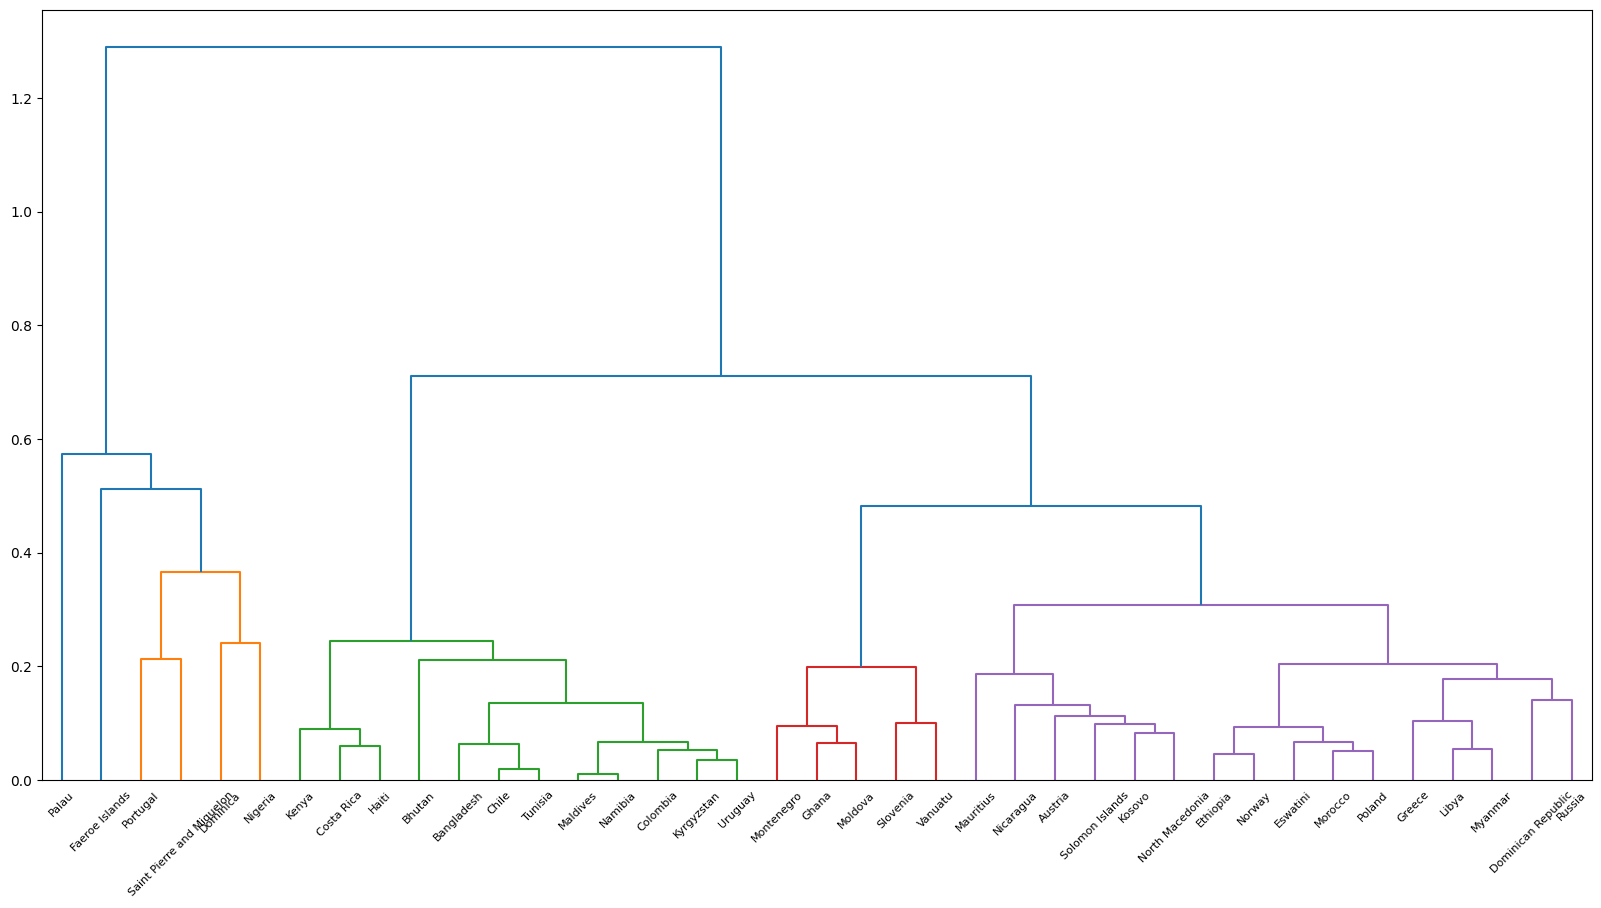

In [180]:
import scipy.cluster.hierarchy as sch

den_df = lag50.set_index(0)


fig = plt.figure(figsize=(20,10))
dendro = sch.linkage(den_df.values, method ='average' , metric = 'euclidean')

# linkage matrix의 세번째 열의 최대값
cutoff = 0.3 * max(dendro[:,2])

dendro_lot = sch.dendrogram(dendro, color_threshold = cutoff, labels = den_df.index.tolist())
plt.show()

✅ 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계

In [181]:
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회,
                     '자연과학': 자연,
                     '공학': 공학},
                     index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])
print (table)

         사회과학  자연과학  공학
3.5~4.5    16    12  18
2.5~3.5    30    20  13
1.5~2.5    12     3  14


In [183]:
from scipy import stats

stat, p_val, d, expected = stats.chi2_contingency(observed=table)

# 귀무 : 성적과 학과 간에는 관련성이 없다
# 대립 : 성적과 학과 간에는 관련성이 있다.

if p_val < 0.05 :
  print("귀무가설 기각 - 관련성이 있다")
else :
  print("귀무가설 채택 - 관련성이 없다")

귀무가설 기각 - 관련성이 있다
